In [1]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import matplotlib.pyplot as plt

# Veri setinin okunması
df = pd.read_csv('../outputs/cleaned_data.csv', encoding='ISO-8859-1')

# Tarih sütununu datetime formatına çevir
df['FaturaTarihi'] = pd.to_datetime(df['FaturaTarihi'])

# Ekranda göster
df['FaturaTarihi']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
406824   2011-12-09 12:50:00
406825   2011-12-09 12:50:00
406826   2011-12-09 12:50:00
406827   2011-12-09 12:50:00
406828   2011-12-09 12:50:00
Name: FaturaTarihi, Length: 406829, dtype: datetime64[ns]

In [2]:
# Genel istatistiksel bilgiler
print(f"Toplam Satış (₤): {df['ToplamFiyat'].sum():.2f}")
print(f"Eşsiz Müşteri Sayısı: {df['MusteriID'].nunique()}")
print(f"Eşsiz Sipariş Sayısı: {df['FaturaNo'].nunique()}")

Toplam Satış (₤): 8300065.81
Eşsiz Müşteri Sayısı: 4372
Eşsiz Sipariş Sayısı: 22190


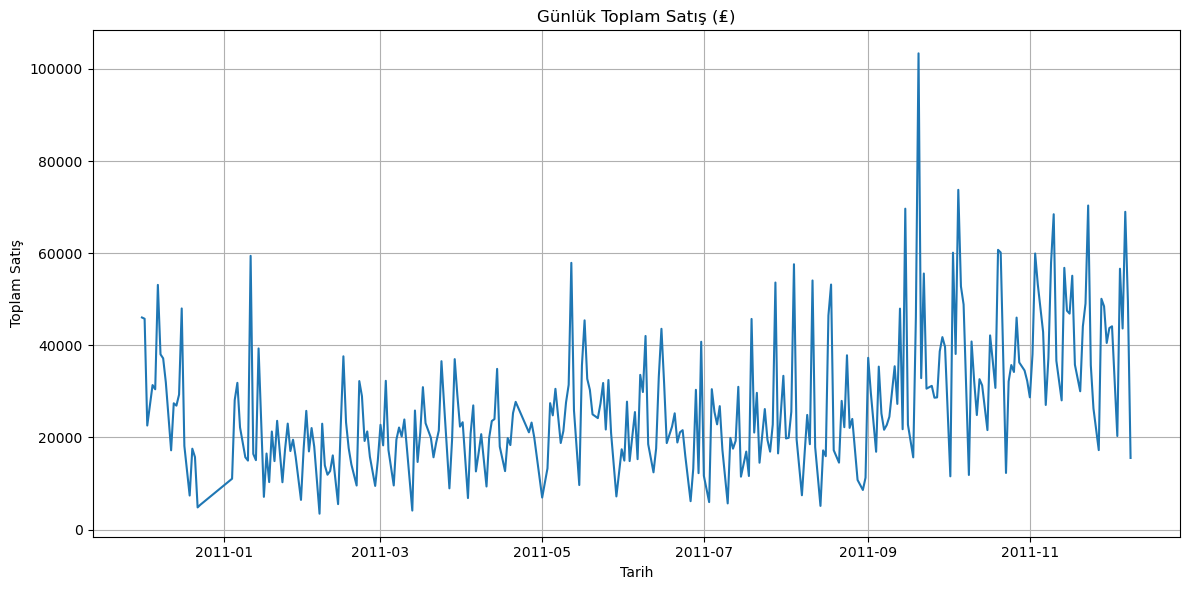

In [3]:
# Günlük satışların hesaplanması
gunluk_satis = df.groupby(df['FaturaTarihi'].dt.date)['ToplamFiyat'].sum()

# Günlük satış grafiği
plt.figure(figsize=(12,6))
gunluk_satis.plot()
plt.title("Günlük Toplam Satış (₤)")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış")
plt.grid()
plt.tight_layout()
plt.show()

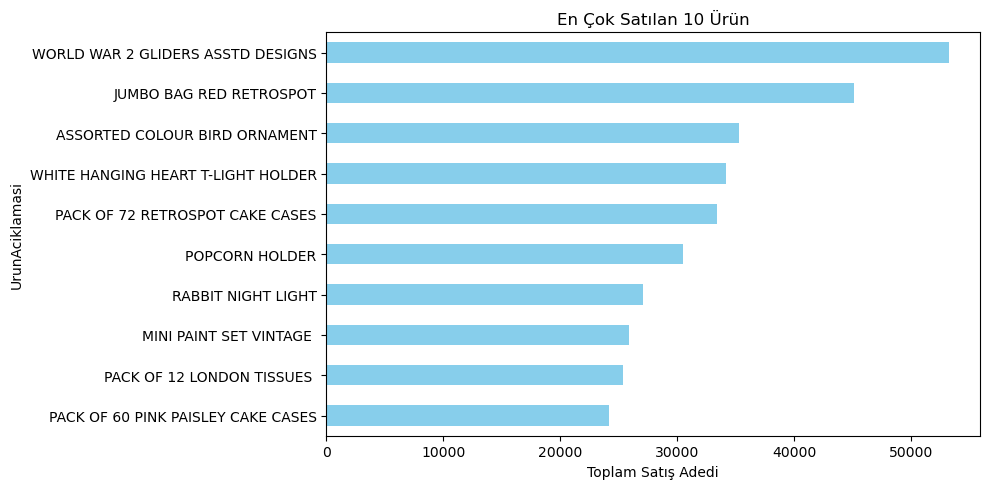

In [4]:
# En çok satılan 10 ürünün hesaplanması
en_cok_satan_urunler = df.groupby('UrunAciklamasi')['Miktar'].sum().sort_values(ascending=False).head(10)

# En çok satılan 10 ürünün grafiği
plt.figure(figsize=(10,5))
en_cok_satan_urunler.plot(kind='barh', color='skyblue')
plt.title("En Çok Satılan 10 Ürün")
plt.xlabel("Toplam Satış Adedi")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

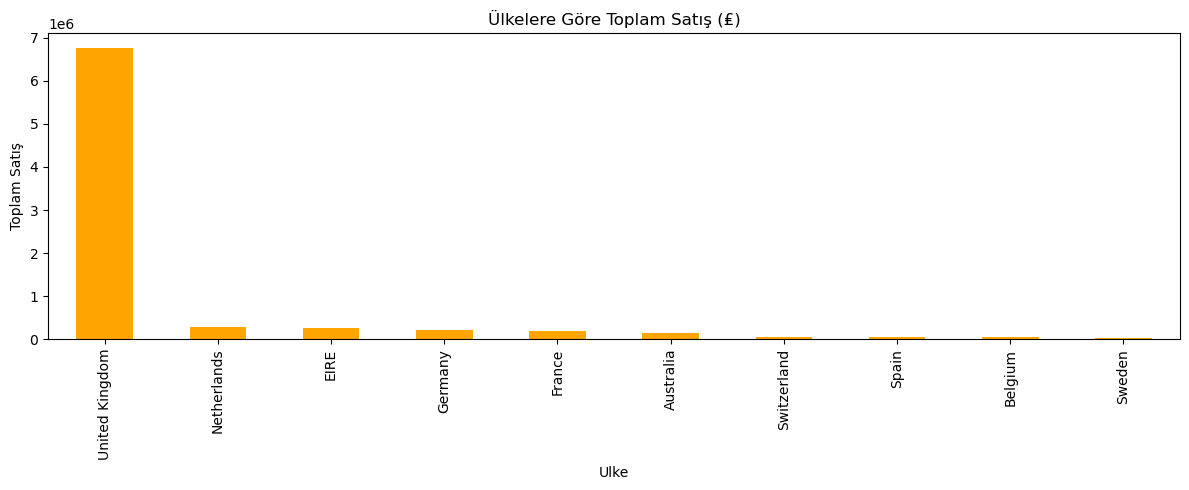

In [5]:
# Ülkelere göre toplam satışların hesaplanması
ulke_bazli_satis = df.groupby('Ulke')['ToplamFiyat'].sum().sort_values(ascending=False)

# Ülkelere göre toplam satışların grafiği
plt.figure(figsize=(12,5))
ulke_bazli_satis.head(10).plot(kind='bar', color='orange')
plt.title("Ülkelere Göre Toplam Satış (₤)")
plt.ylabel("Toplam Satış")
plt.tight_layout()
plt.show()

In [6]:
# FaturaAy sütunu oluşturularak, faturaların aylık döneme göre gruplanması
df['FaturaAy'] = df['FaturaTarihi'].dt.to_period('M')

# Aylık toplam satışların hesaplanması
aylik_satis = df.groupby('FaturaAy').agg({'ToplamFiyat': 'sum'})

# Grafik oluşturuluyor
plt.figure(figsize=(10,6))
aylik_satis.plot(kind='line', color='steelblue', linewidth=2)
plt.title('Aylık Toplam Satışlar', fontsize=18, ha='center', fontweight='bold', color='darkblue')
plt.ylabel('Toplam Satış', fontsize=14, fontweight='bold')
plt.xlabel('Aylık Dönem', fontsize=14, fontweight='bold')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Grafiğin kaydedilmesi
plt.savefig('../visuals/aylık_satışlar.png', dpi=300, bbox_inches='tight')

# Grafik kapatılır
plt.close()

<Figure size 1000x600 with 0 Axes>

In [7]:
# En çok satış yapan ürünler
en_cok_satanlar = df.groupby('UrunAciklamasi').agg({'ToplamFiyat': 'sum'}).sort_values('ToplamFiyat', ascending=False).head(10)

# Dikey bar grafiği
en_cok_satanlar.plot(kind='bar', figsize=(10,6), color='lightblue')

# Grafik oluşturuluyor
plt.title('En Çok Satan Ürünler', fontsize=18, ha='center', fontweight='bold', color='darkblue')
plt.xlabel('Satış Miktarı', fontsize=14, fontweight='bold')
plt.ylabel('Ürünler', fontsize=14, fontweight='bold') 
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2) 

# Görseli kaydet
plt.savefig('../visuals/en_iyi_ürünler.png', dpi=300, bbox_inches='tight')

# Grafiği kapatma
plt.close()


In [8]:
# Ülke bazında toplam satışların hesaplanması ve sıralanması
ulke_satis = df.groupby('Ulke').agg({'ToplamFiyat': 'sum'}).sort_values('ToplamFiyat', ascending=False)

# Grafik oluşturuluyor
ulke_satis.plot(kind='barh', figsize=(14,10), color='skyblue') 
plt.title('Ülke Bazında Satışlar', fontsize=18, ha='center', fontweight='bold', color='darkblue') 
plt.xlabel('Toplam Satış', fontsize=14, fontweight='bold') 
plt.ylabel('Ülke', fontsize=14, fontweight='bold') 
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) 

# Görseli kaydet
plt.savefig('../visuals/ülke_satış_haritası.png', dpi=300, bbox_inches='tight')

# Grafiği kapatma
plt.close()
